In [1]:
import os
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn as nn
from torch import optim
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import torchvision

import helper_utils

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using device: CUDA")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"Using device: MPS (Apple Silicon GPU)")
else:
    device = torch.device("cpu")
    print(f"Using device: CPU")

Using device: CPU


In [3]:
# Set the path to store the dataset files
data_path = "./EMNIST_data"

In [4]:
# transform= transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.1736),(0.3317))
# ])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.transpose(1, 2).flip(1))  # fix orientation
])


In [5]:
train_data= torchvision.datasets.EMNIST(
    root=data_path,
    split='letters',
    train=True,
    download=True,
)

test_dataset = torchvision.datasets.EMNIST(
    root=data_path,  # Specify the root directory for the dataset
    split='letters',  # Use the 'letters' subset (26 lowercase classes)
    train=False,  # Indicate that this is the test set
    download=True  # Download the dataset if needed (based on the previous check)
)

<PIL.Image.Image image mode=L size=28x28 at 0x204CE7FD7F0>


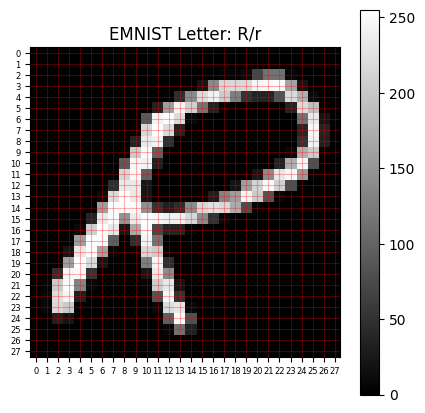

In [6]:
# Set the index of the sample image to view
index = 90000

# Retrieve the transformed image tensor and its label from the training set
img_tensor, label = train_data[index]

# Print the image tensor to see the raw values (after transformation)
print(img_tensor)
def correct_image_orientation(image):
    rotated = F.rotate(image, 90) # Rotate the image 90 degrees clockwise
    flipped = F.vflip(rotated) # Flip the image vertically
    return flipped

# Rotate the image and Reflect it
img_transformed = correct_image_orientation(img_tensor)

# Visualize the transformed image
helper_utils.visualize_image(img_transformed, label)

In [7]:
train_data= torchvision.datasets.EMNIST(
    root=data_path,
    split='letters',
    train=True,
    download=True,
    transform= transform
)

test_dataset = torchvision.datasets.EMNIST(
    root=data_path,  # Specify the root directory for the dataset
    split='letters',  # Use the 'letters' subset (26 lowercase classes)
    train=False,  # Indicate that this is the test set
    download=True, # Download the dataset if needed (based on the previous check)
    transform= transform
)

In [8]:
# Set the index of the sample image to view
index = 90000

# Retrieve the transformed image tensor and its label from the training set
img_tensor, label = train_data[index]

# Print the image tensor to see the raw values (after transformation)
print(img_tensor)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.4431, 0.1255, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1255, 0.0784, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.3725, 0.9843, 0.3137, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

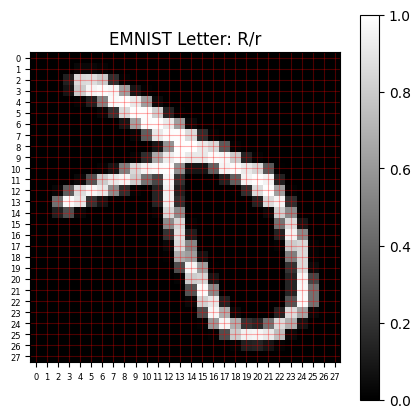

In [9]:
def correct_image_orientation(image):
    rotated = F.rotate(image, 90) # Rotate the image 90 degrees clockwise
    flipped = F.vflip(rotated) # Flip the image vertically
    return flipped

# Rotate the image and Reflect it
img_transformed = correct_image_orientation(img_tensor)

# Visualize the transformed image
helper_utils.visualize_image(img_transformed, label)

In [10]:
train_dataloaders= DataLoader(dataset=train_data,batch_size=64,shuffle=True)
test_dataloaders=DataLoader(dataset=train_data,batch_size=1000,shuffle=False)

In [11]:
print("--- Train Loader --- \n")
helper_utils.display_data_loader_contents(train_dataloaders)
print("\n--- Test Loader --- \n")
helper_utils.display_data_loader_contents(test_dataloaders)

--- Train Loader --- 

Total number of images in dataset: 124800
Total number of batches: 1950
--- Batch 1 ---
Data shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])

--- Test Loader --- 

Total number of images in dataset: 124800
Total number of batches: 125
--- Batch 1 ---
Data shape: torch.Size([1000, 1, 28, 28])
Labels shape: torch.Size([1000])


In [12]:
# class SimpleletterNN(nn.Module):
#     def __init__(self):
#         super(SimpleletterNN,self).__init__()
#         self.flatten=nn.Flatten()
#         self.layers= nn.Sequential(
#             nn.Linear(784,125),
#             nn.ReLU(),
#             nn.Linear(125,26)
#         )
#     def forward(self,x):
#         x=self.flatten(x)
#         x= self.layers(x)
#         return x

class SimpleLetterNN(nn.Module):
    def __init__(self):
        super(SimpleLetterNN, self).__init__()
        
        self.flatten = nn.Flatten()

        self.layers = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 27)  # 26 letters A–Z
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.layers(x)


In [13]:
model= SimpleLetterNN()
loss_function= nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(),lr=0.001)

In [14]:
# def trainfunc(model,loss_function,optimizer,train_dataloaders,device):
#     # Ensure the model is on the correct device for training
#     model = model.to(device)
#     # Set the model to training mode
#     model.train()

#     for idex,(input,target) in enumerate(train_dataloaders):
 
#         input, target= input.to(device) ,target.long().to(device)

#         optimizer.zero_grad()
#         output=model(input)
#         loss=loss_function(output,target)
#         loss.backward()
#         optimizer.step()

#     return model


def trainfunc(model, loss_function, optimizer, train_dataloaders, device):
    model.train()
    total_loss = 0

    for input, target in train_dataloaders:
        input = input.to(device)
        target = target.to(device)

        optimizer.zero_grad()
        output = model(input)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_dataloaders)


In [15]:
# def evalfunc(model,test_dataloaders,device):
#     model.eval()
#     with torch.no_grad():
#         for input,target in test_dataloaders:
#             input, targets = input.to(device), target.long().to(device)
#             output=model(input)

#     return output

def evalfunc(model, test_dataloaders, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for input, target in test_dataloaders:
            input = input.to(device)
            target = target.long().to(device)

            output = model(input)
            preds = output.argmax(dim=1)

            correct += (preds == target).sum().item()
            total += target.size(0)

    return correct / total


In [16]:
num_epochs = 5
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    print(f"\n[Training] Epoch {epoch+1}")
    loss = trainfunc(model, loss_function, optimizer, train_dataloaders, device)
    train_losses.append(loss)

    print(f"[Testing] Epoch {epoch+1}")
    acc = evalfunc(model, test_dataloaders, device)
    test_accuracies.append(acc)

    print(f"Loss: {loss:.4f} | Accuracy: {acc*100:.2f}%")



[Training] Epoch 1
[Testing] Epoch 1
Loss: 0.7253 | Accuracy: 87.32%

[Training] Epoch 2
[Testing] Epoch 2
Loss: 0.3650 | Accuracy: 90.56%

[Training] Epoch 3
[Testing] Epoch 3
Loss: 0.2952 | Accuracy: 92.17%

[Training] Epoch 4
[Testing] Epoch 4
Loss: 0.2554 | Accuracy: 92.82%

[Training] Epoch 5
[Testing] Epoch 5
Loss: 0.2273 | Accuracy: 93.48%


In [17]:
batch = next(iter(train_dataloaders))
print(batch[0].shape)  # images
print(batch[1].shape)  # labels


torch.Size([64, 1, 28, 28])
torch.Size([64])
